In [1]:
import numpy as np
import os
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print("packages loaded")

packages loaded


<h1>Define network</h1>

In [2]:
def net(data_path, input_image):
    layers = (
        'conv1_1','relu1_1','conv1_2','relu1_2','pool1',
        'conv2_1','relu2_1','conv2_2','relu2_2','pool2',
        'conv3_1','relu3_1','conv3_2','relu3_2','conv3_3',
        'relu3_3','conv3_4','relu3_4','pool3',
        'conv4_1','relu4_1','conv4_2','relu4_2','conv4_3',
        'relu4_3','conv4_4','relu4_4','pool4',
        'conv5_1','relu5_1','conv5_2','relu5_2','conv5_3',
        'relu5_3','conv5_4','relu5_4'
    )
    
    data =scipy.io.loadmat(data_path)
    mean = data['normalization'][0][0][0]
    #print(mean)
    mean_pixel = np.mean(mean,axis=(0,1))
    #print(data)
    #print(mean_pixel)
    weights = data['layers'][0]
    #print(weights)
    net = {}
    current = input_image
    
    print(current)
    
    for i, name in enumerate(layers):
        kind = name[:4]
        if kind =='conv':
            kernels, bias = weights[i][0][0][0][0]
            #print(i)
            #print("kernel")
            kernels = np.transpose(kernels,(1,0,2,3))
            #print(kernels.shape)
            bias = bias.reshape(-1)
            #print("bias")
            #print(bias.shape)
            current = _conv_layer(current, kernels, bias)
            
        elif kind=='relu':
            current = tf.nn.relu(current)
        elif kind == 'pool':
            current = _pool_layer(current)
        net[name] = current
        
    assert len(net) == len(layers)
    return net, mean_pixel, layers

print("Network for VGG Ready")

Network for VGG Ready


<h1> Define functions </h1>

In [3]:
def _conv_layer(input, weights, bias):
    conv = tf.nn.conv2d(input, tf.constant(weights), strides=(1,1,1,1),padding='SAME')
    return tf.nn.bias_add(conv,bias)

def _pool_layer(input):
    return tf.nn.max_pool(input, ksize=(1,2,2,1),strides=(1,2,2,1),padding='SAME')

def preprocess(image, mean_pixel):
    return image- mean_pixel

def unprocess(image, mean_pixel):
    return image+mean_pixel

def imread(path):
    return scipy.misc.imread(path).astype(np.float)

def imsave(path,img):
    img = np.clip(img,0,255).astype(np.uint8)
    scipy.misc.imsave(path,img)
    
print("Functions for VGG Ready")

Functions for VGG Ready


<h1> RUN </h1>

/home/sweetzlab/develop_folder/tensorflow101/data/imagenet-vgg-verydeep-19.mat
(1, 1600, 2400, 3)
Tensor("Placeholder:0", shape=(1, 1600, 2400, 3), dtype=float32)
('conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1', 'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2', 'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3', 'relu3_3', 'conv3_4', 'relu3_4', 'pool3', 'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3', 'relu4_3', 'conv4_4', 'relu4_4', 'pool4', 'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3', 'relu5_3', 'conv5_4', 'relu5_4')
[1/36] conv1_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 1600, 2400, 64)


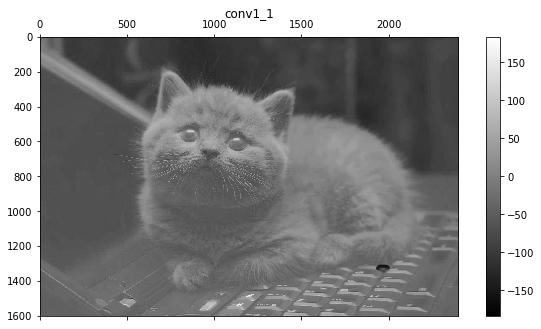

[2/36] relu1_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 1600, 2400, 64)


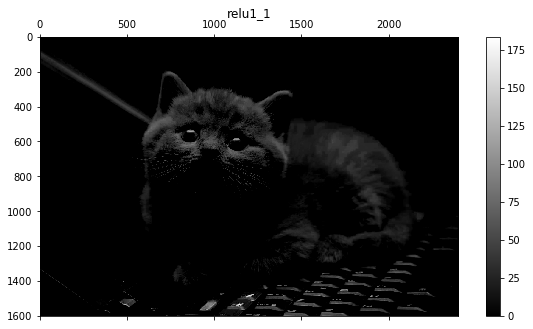

[3/36] conv1_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 1600, 2400, 64)


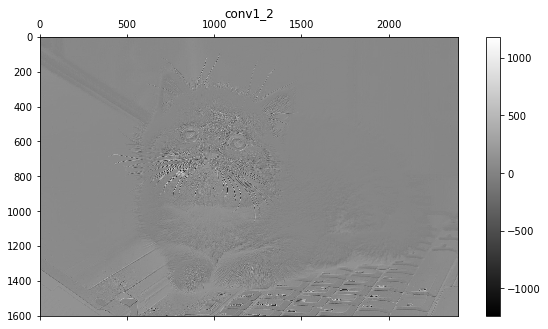

[4/36] relu1_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 1600, 2400, 64)


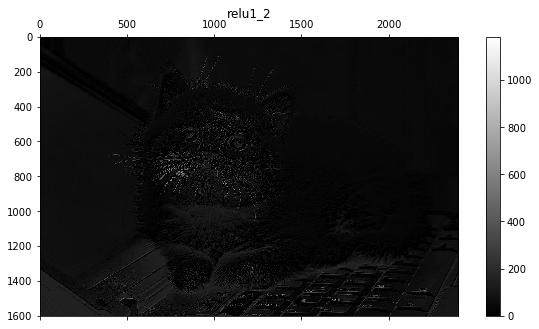

[5/36] pool1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 800, 1200, 64)


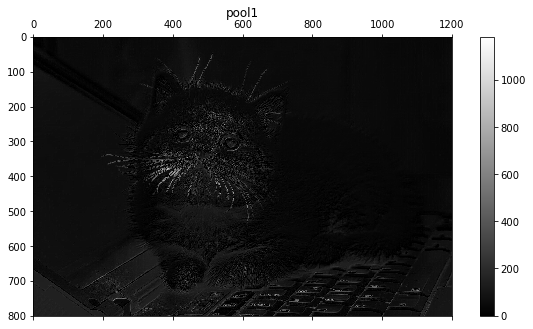

[6/36] conv2_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 800, 1200, 128)


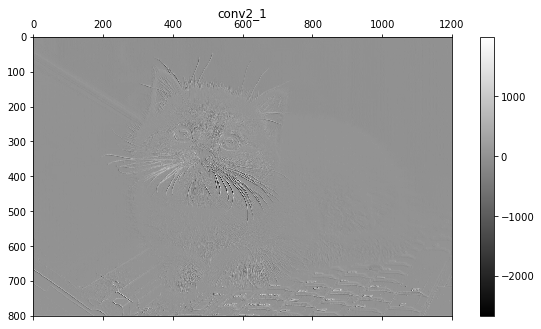

[7/36] relu2_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 800, 1200, 128)


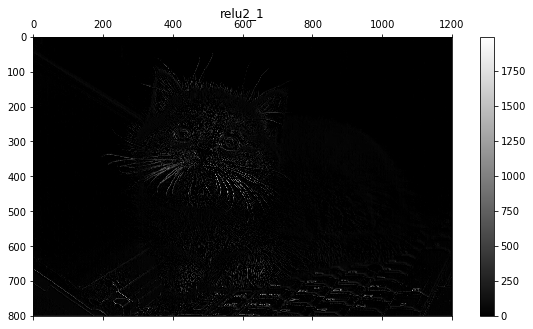

[8/36] conv2_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 800, 1200, 128)


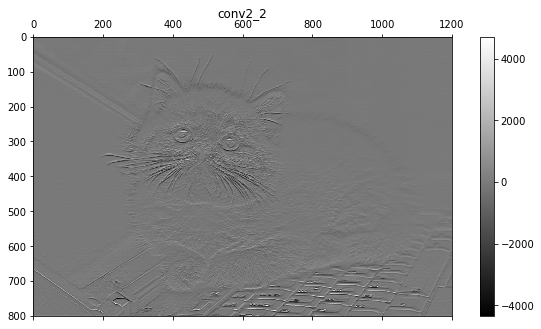

[9/36] relu2_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 800, 1200, 128)


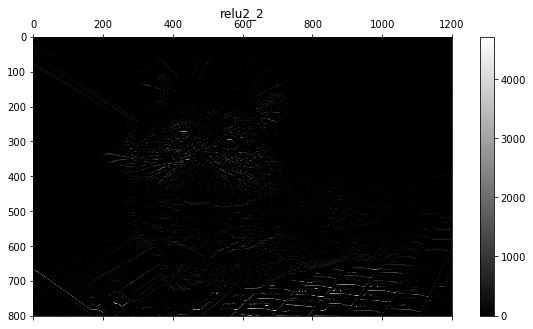

[10/36] pool2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 128)


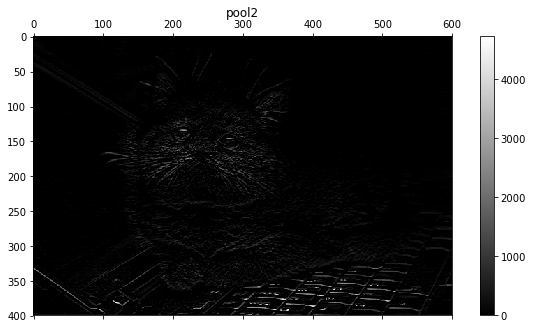

[11/36] conv3_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 256)


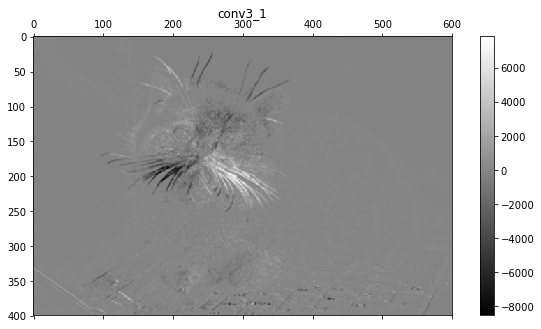

[12/36] relu3_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 256)


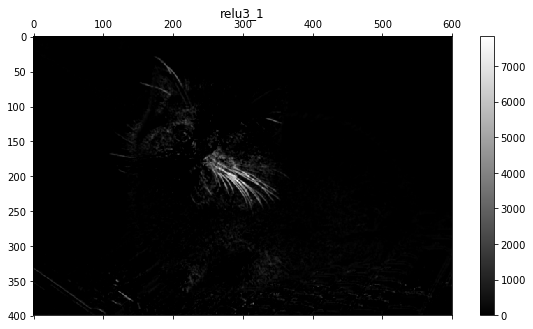

[13/36] conv3_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 256)


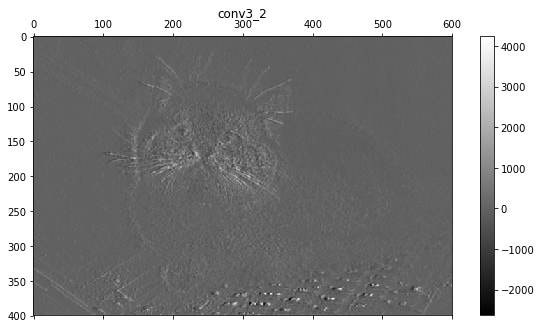

[14/36] relu3_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 256)


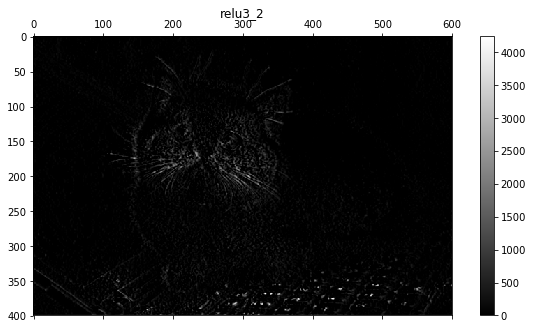

[15/36] conv3_3
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 256)


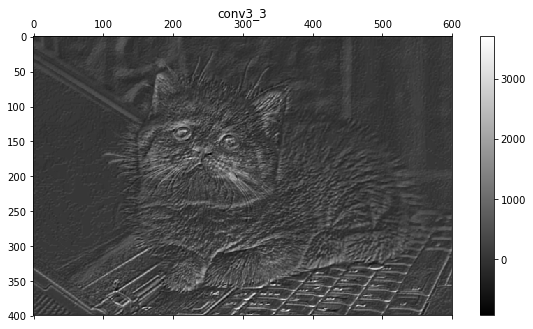

[16/36] relu3_3
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 256)


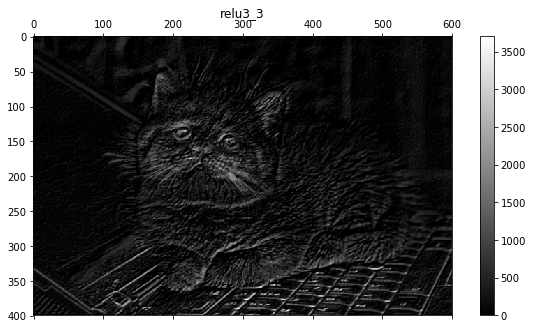

[17/36] conv3_4
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 256)


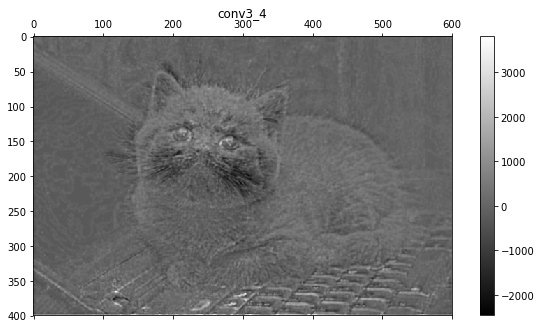

[18/36] relu3_4
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 400, 600, 256)


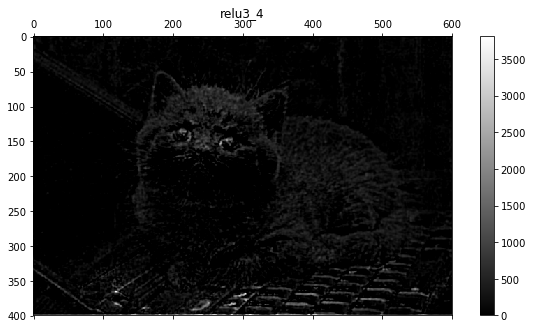

[19/36] pool3
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 256)


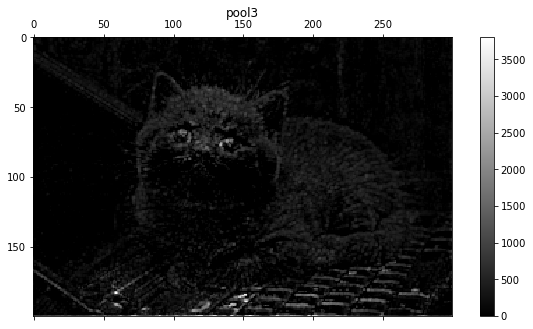

[20/36] conv4_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 512)


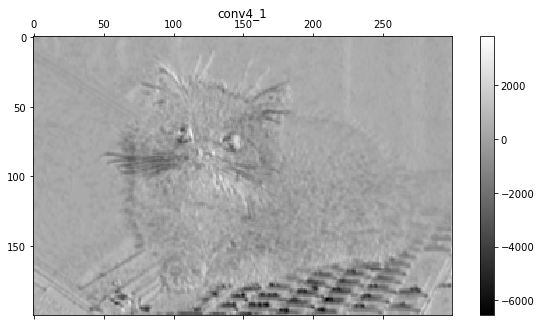

[21/36] relu4_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 512)


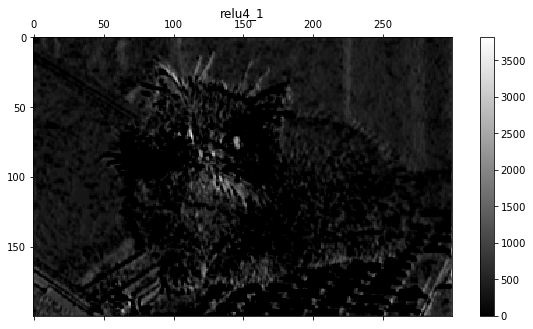

[22/36] conv4_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 512)


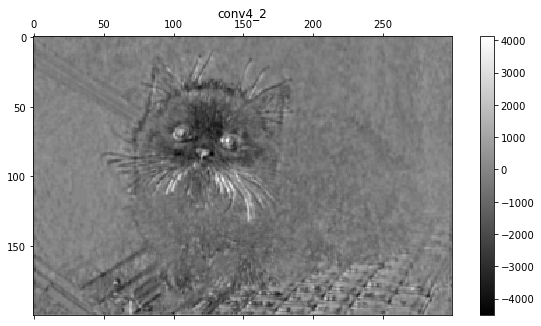

[23/36] relu4_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 512)


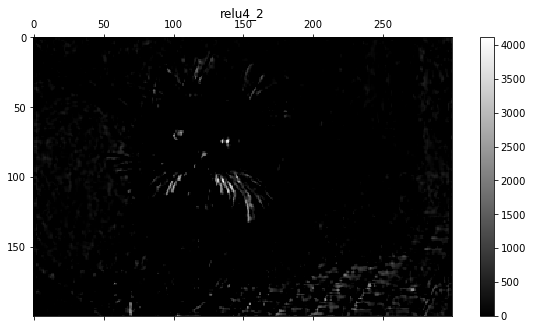

[24/36] conv4_3
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 512)


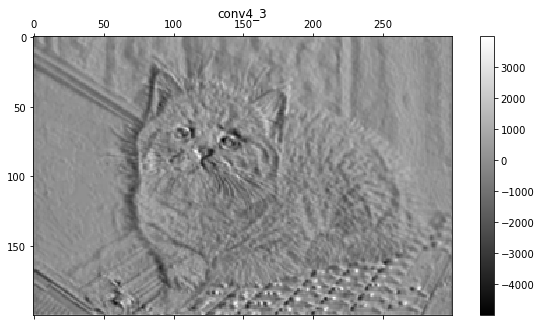

[25/36] relu4_3
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 512)


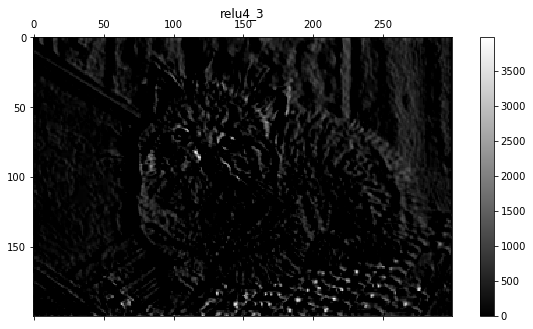

[26/36] conv4_4
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 512)


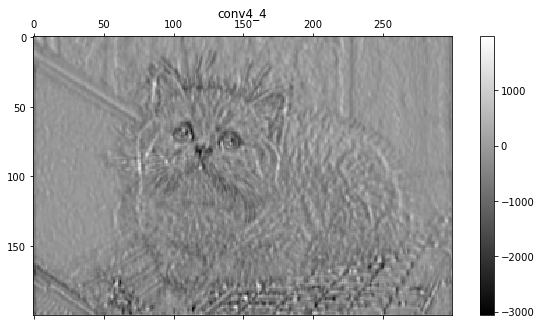

[27/36] relu4_4
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 200, 300, 512)


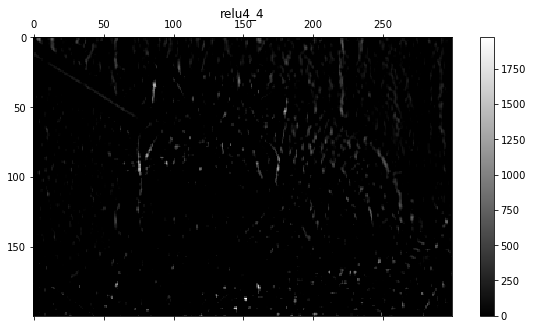

[28/36] pool4
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


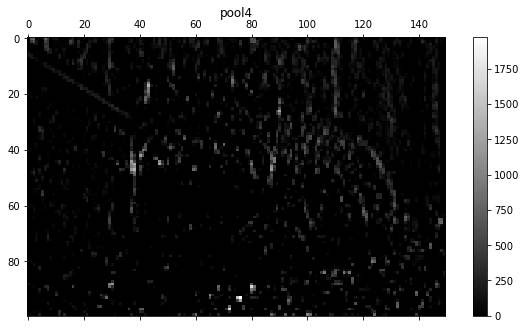

[29/36] conv5_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


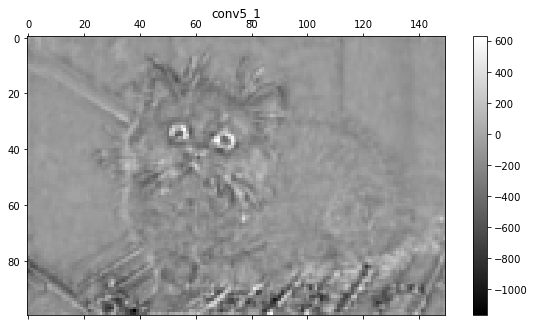

[30/36] relu5_1
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


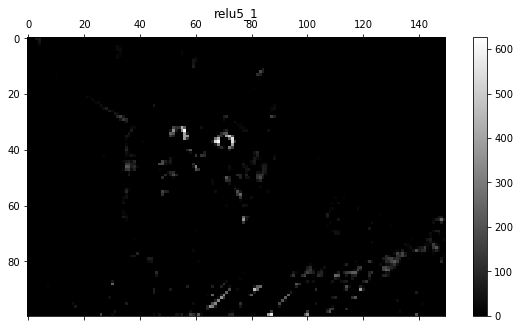

[31/36] conv5_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


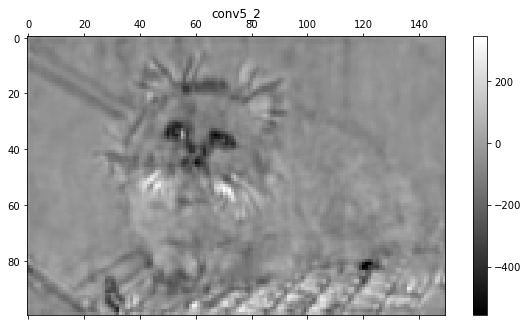

[32/36] relu5_2
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


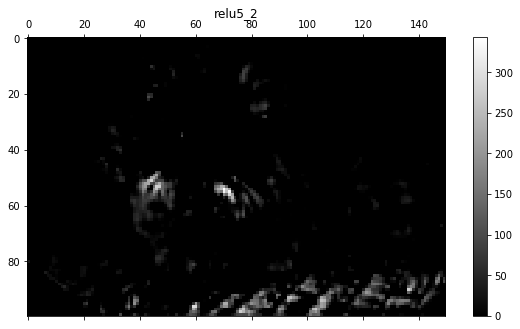

[33/36] conv5_3
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


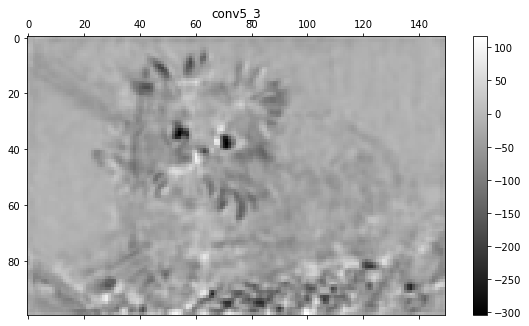

[34/36] relu5_3
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


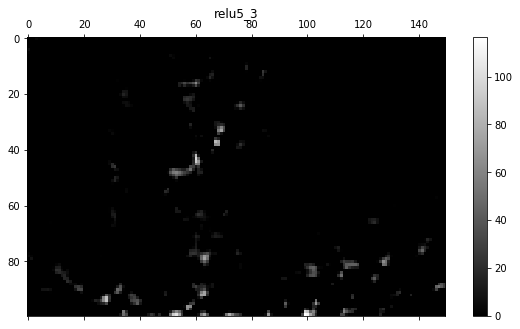

[35/36] conv5_4
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


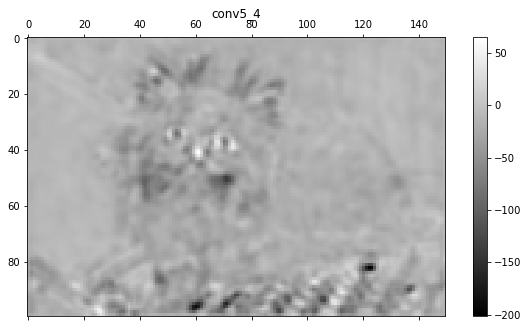

[36/36] relu5_4
Type of 'features' is  <class 'numpy.ndarray'>
Shape of 'features' is (1, 100, 150, 512)


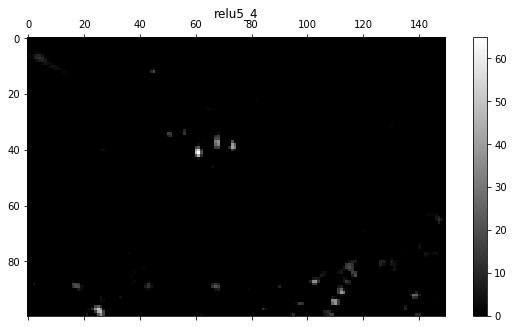

In [4]:
cwd = os.getcwd()
VGG_PATH = cwd+"/data/imagenet-vgg-verydeep-19.mat"
IMG_PATH = cwd+"/images/cat.jpg"
input_image = imread(IMG_PATH)
shape = (1,) + input_image.shape 
print(VGG_PATH)
print(shape)

with tf.Graph().as_default(), tf.Session() as sess:
    image = tf.placeholder('float',shape=shape)
    nets, mean_pixel , all_layers = net(VGG_PATH,image)
    
    input_image_pre = np.array([preprocess(input_image, mean_pixel)])
    layers = all_layers
    print(layers)
    
    for i,layer in enumerate(layers):
        print("[%d/%d] %s" %(i+1, len(layers), layer))
        #features= net[layer].eval(feed_dict={image: input_image_pre})
        features = nets[layer].eval(feed_dict={image: input_image_pre})
        
        print("Type of 'features' is ",type(features))
        print("Shape of 'features' is %s"%(features.shape,))
        
        #plot response
        if 1:
            plt.figure(i+1, figsize=(10,5))
            plt.matshow(features[0,:,:,1], cmap=plt.cm.gray, fignum=i+1)
            plt.title(""+layer)
            plt.colorbar()
            plt.show()